In [1]:
import pandas as pd 


In [17]:
# Task 01:

# 1.1 Load the file:
path = "data.csv"
df_raw = pd.read_csv(filepath_or_buffer=path)

# 1.2 Show the sizes:
rows, column = df_raw.shape
print(f"The data has {rows} rows and {column} columns.")

# 1.3 Show some data:
df_raw.head(3)

The data has 1000 rows and 17 columns.


,Unnamed: 0,F00,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F13,F14,class
0,0,NaN,0.430770,-0.609499,0.153154,-0.244014,1.515603,0.153154,0.950208,-0.533577,0.153154,-1.188635,0.117022,0,D,0.078747,1
1,1,NaN,0.926832,-1.232067,-2.397645,-2.147707,-0.907709,-2.397645,-3.431166,-0.851632,-2.397645,-0.614415,-0.641244,0,C,-0.277881,1
2,2,NaN,1.488724,1.732096,-0.247872,2.564819,-0.744121,-0.247872,-0.298340,-0.276540,-0.247872,1.395205,-0.290211,6,B,1.070634,0


In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   F00         50 non-null     float64
 2   F01         1000 non-null   float64
 3   F02         1000 non-null   float64
 4   F03         1000 non-null   float64
 5   F04         1000 non-null   float64
 6   F05         1000 non-null   float64
 7   F06         1000 non-null   float64
 8   F07         1000 non-null   float64
 9   F08         1000 non-null   float64
 10  F09         1000 non-null   float64
 11  F10         1000 non-null   float64
 12  F11         1000 non-null   float64
 13  F12         1000 non-null   int64  
 14  F13         1000 non-null   object 
 15  F14         1000 non-null   float64
 16  class       1000 non-null   int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 132.9+ KB


As we can see, the columns 0 and 1 can be dropped. 
- The column 0 is just the index of the rowns;
- The column 1 has only 50 non-null numbers out of 1000 rowns, therefore, they won't be helpful in our analyzes. 


In [19]:
columsn_names = df_raw.columns
print(f"Columns Name: {list(columsn_names)}")

Columns Name: ['Unnamed: 0', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'class']


In [20]:
df_raw = df_raw.drop(labels=["Unnamed: 0", "F00"], axis=1)
df_raw.head(3)

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F13,F14,class
0,0.430770,-0.609499,0.153154,-0.244014,1.515603,0.153154,0.950208,-0.533577,0.153154,-1.188635,0.117022,0,D,0.078747,1
1,0.926832,-1.232067,-2.397645,-2.147707,-0.907709,-2.397645,-3.431166,-0.851632,-2.397645,-0.614415,-0.641244,0,C,-0.277881,1
2,1.488724,1.732096,-0.247872,2.564819,-0.744121,-0.247872,-0.298340,-0.276540,-0.247872,1.395205,-0.290211,6,B,1.070634,0


In [21]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F01     1000 non-null   float64
 1   F02     1000 non-null   float64
 2   F03     1000 non-null   float64
 3   F04     1000 non-null   float64
 4   F05     1000 non-null   float64
 5   F06     1000 non-null   float64
 6   F07     1000 non-null   float64
 7   F08     1000 non-null   float64
 8   F09     1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   int64  
 12  F13     1000 non-null   object 
 13  F14     1000 non-null   float64
 14  class   1000 non-null   int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 117.3+ KB


In [22]:
# Task 02:

df = df_raw.copy()

for column_name in df:
    
    missing_feature = df[column_name].isnull()
    qnt_missing_feature = missing_feature.sum()

    if qnt_missing_feature > 0:

        print(f"Missing feature {column_name} ({df[column_name].dtype}): {qnt_missing_feature}")

        if df[column_name].dtype not in [int, float]:
            df[column_name] = df[column_name].fillna(value="unknown")

        else:
            mean = df[column_name].mean()
            df[column_name] = df[column_name].fillna(value=mean)
    

In [23]:
df.head(3)

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F13,F14,class
0,0.430770,-0.609499,0.153154,-0.244014,1.515603,0.153154,0.950208,-0.533577,0.153154,-1.188635,0.117022,0,D,0.078747,1
1,0.926832,-1.232067,-2.397645,-2.147707,-0.907709,-2.397645,-3.431166,-0.851632,-2.397645,-0.614415,-0.641244,0,C,-0.277881,1
2,1.488724,1.732096,-0.247872,2.564819,-0.744121,-0.247872,-0.298340,-0.276540,-0.247872,1.395205,-0.290211,6,B,1.070634,0


In [24]:
df.describe()

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F14,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.464389,0.024135,-0.090224,0.597048,-0.019323,-0.090224,-0.018502,0.017389,-0.090224,0.200876,0.019299,2.481000,0.163715,0.505000
std,1.253621,0.981668,1.047949,1.525925,1.007243,1.047949,1.493104,0.995193,1.047949,1.649333,1.015434,2.280974,0.534304,0.596935
min,-3.839055,-3.678544,-2.900095,-5.303289,-3.411312,-2.900095,-4.593151,-2.870350,-2.900095,-4.562059,-3.375156,0.000000,-1.613691,0.000000
25%,-0.261353,-0.643978,-0.847538,-0.302429,-0.635943,-0.847538,-1.070465,-0.650032,-0.847538,-1.024788,-0.657205,1.000000,-0.213942,0.000000
50%,0.554465,0.041989,-0.186079,0.754161,-0.019371,-0.186079,-0.046749,0.041118,-0.186079,0.166277,0.038561,2.000000,0.148387,0.000000
75%,1.289121,0.683684,0.565310,1.647466,0.618085,0.565310,1.049437,0.715784,0.565310,1.347618,0.660219,4.000000,0.523251,1.000000
max,4.105899,3.140142,3.755152,4.404735,3.311701,3.755152,4.658191,2.651399,3.755152,5.344298,3.497461,7.000000,1.775008,2.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F01     1000 non-null   float64
 1   F02     1000 non-null   float64
 2   F03     1000 non-null   float64
 3   F04     1000 non-null   float64
 4   F05     1000 non-null   float64
 5   F06     1000 non-null   float64
 6   F07     1000 non-null   float64
 7   F08     1000 non-null   float64
 8   F09     1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   int64  
 12  F13     1000 non-null   object 
 13  F14     1000 non-null   float64
 14  class   1000 non-null   int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 117.3+ KB


In [26]:
df["class"].unique(), df["F13"].unique()

(array([1, 0, 2]), array(['D', 'C', 'B', 'A'], dtype=object))

As we can see, two very important point here:

1. We have 3 classes (0, 1, 2 ) and they are numerical, therefore, we need to use a multi-class method;
2. The column F13 has categorical values, and we need to encode them before use it for training.

Also, we have a not balanced dataset that we will need to work on. We have way less data for the class 2, that we have for the others.

In [50]:
df["class"].value_counts()

class
0    548
1    399
2     53
Name: count, dtype: int64

Here, our data is balanced for the three values of F13.

In [51]:
df["F13"].value_counts()

F13
B    269
A    253
D    239
C    239
Name: count, dtype: int64

In [60]:
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()
df_cleaned_std_caler = df.copy()

categorical_cols = df_cleaned_std_caler.select_dtypes(exclude="number").columns
df_cleaned_std_caler[categorical_cols] = encoder.fit_transform(X=df_cleaned_std_caler[categorical_cols])

df_cleaned_std_caler.head(3)

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F13,F14,class
0,0.430770,-0.609499,0.153154,-0.244014,1.515603,0.153154,0.950208,-0.533577,0.153154,-1.188635,0.117022,0,3.0,0.078747,1
1,0.926832,-1.232067,-2.397645,-2.147707,-0.907709,-2.397645,-3.431166,-0.851632,-2.397645,-0.614415,-0.641244,0,2.0,-0.277881,1
2,1.488724,1.732096,-0.247872,2.564819,-0.744121,-0.247872,-0.298340,-0.276540,-0.247872,1.395205,-0.290211,6,1.0,1.070634,0


class
0    548
1    399
2     53
Name: count, dtype: int64

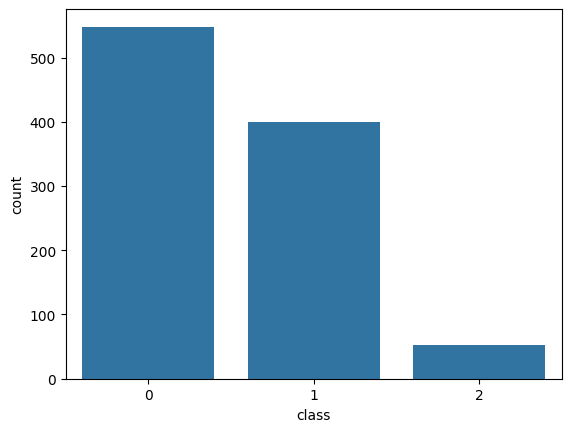

In [64]:
import seaborn as sns 


ax = sns.countplot(x="class", data=df_cleaned_std_caler)
df["class"].value_counts()

# First Approach:
- Let's start training a model without balancing the classes.


In [99]:
df_unbalanced = df_cleaned_std_caler.copy()
df_unbalanced.head()

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F13,F14,class
0,0.430770,-0.609499,0.153154,-0.244014,1.515603,0.153154,0.950208,-0.533577,0.153154,-1.188635,0.117022,0,3.0,0.078747,1
1,0.926832,-1.232067,-2.397645,-2.147707,-0.907709,-2.397645,-3.431166,-0.851632,-2.397645,-0.614415,-0.641244,0,2.0,-0.277881,1
2,1.488724,1.732096,-0.247872,2.564819,-0.744121,-0.247872,-0.298340,-0.276540,-0.247872,1.395205,-0.290211,6,1.0,1.070634,0
3,0.476623,0.494316,0.585131,0.434526,-0.670993,0.585131,1.527264,0.370484,0.585131,-0.549108,0.009128,0,1.0,0.524313,1
4,1.873207,-0.399677,-1.768674,0.600575,0.274092,-1.768674,-2.147604,0.623849,-1.768674,-0.387073,-0.470436,3,3.0,0.411954,2


In [101]:
df_unbalanced["class"].value_counts()

class
0    548
1    399
2     53
Name: count, dtype: int64

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score


In [102]:
# Separate features and target
X = df_unbalanced.drop("class", axis=1)
y = df_unbalanced["class"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [103]:
# Random Forest
rf_clf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Logistic Regression
lr_clf = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)


In [104]:
# Evaluate Random Forest
rf_f1_macro = f1_score(y_test, rf_pred, average="macro")
print(f"Random Forest F1-Score (Macro): {rf_f1_macro:.4f}")
print(classification_report(y_test, rf_pred, zero_division=1))

# Evaluate Logistic Regression
lr_f1_macro = f1_score(y_test, lr_pred, average="macro")
print(f"Logistic Regression F1-Score (Macro): {lr_f1_macro:.4f}")
print(classification_report(y_test, lr_pred, zero_division=1))


Random Forest F1-Score (Macro): 0.5378
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       109
           1       0.78      0.78      0.78        80
           2       1.00      0.00      0.00        11

    accuracy                           0.79       200
   macro avg       0.86      0.55      0.54       200
weighted avg       0.80      0.79      0.77       200

Logistic Regression F1-Score (Macro): 0.8848
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       109
           1       0.91      0.86      0.88        80
           2       0.77      0.91      0.83        11

    accuracy                           0.91       200
   macro avg       0.87      0.91      0.88       200
weighted avg       0.91      0.91      0.91       200



## `GridSearchCV for Random Forest`:

In [105]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20],     # Depth of each tree
    "min_samples_split": [2, 5, 10], # Minimum samples to split
}

# Set up GridSearchCV
rf_grid = GridSearchCV(
    estimator = RandomForestClassifier(
            class_weight = "balanced", 
            random_state = 42,
        ),
    param_grid = rf_param_grid,
    scoring = "f1_macro",   # Optimize for f1_score_macro
    cv = 5,                 # 5-fold cross-validation
    verbose = 2,            # Show progress
)

# Fit the model
rf_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters for Random Forest: {rf_grid.best_params_}")
print(f"Best F1-Score (Macro) for Random Forest: {rf_grid.best_score_:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_s

## `GridSearchCV for Logistic Regression`:

In [106]:
# Hyperparameter grid for Logistic Regression
lr_param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],      # Regularization strength
    "solver": ["liblinear", "lbfgs"],  # Optimization solvers
}

# Set up GridSearchCV
lr_grid = GridSearchCV(
    estimator=LogisticRegression(
            class_weight = "balanced", 
            max_iter = 1000, 
            random_state = 42,
        ),
    param_grid = lr_param_grid,
    scoring = "f1_macro",  # Optimize for f1_score_macro
    cv = 5,                # 5-fold cross-validation
    verbose = 2,            # Show progress
)

# Fit the model
lr_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters for Logistic Regression: {lr_grid.best_params_}")
print(f"Best F1-Score (Macro) for Logistic Regression: {lr_grid.best_score_:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solv

## `Evaluate Best Models on Test Set`:

In [108]:
# Evaluate the best Random Forest model
rf_best = rf_grid.best_estimator_
rf_test_pred = rf_best.predict(X_test)
rf_test_f1_macro = f1_score(y_test, rf_test_pred, average="macro")
print(f"Random Forest Test F1-Score (Macro): {rf_test_f1_macro:.4f}")
print(classification_report(y_test, rf_test_pred, zero_division=1))

# Evaluate the best Logistic Regression model
lr_best = lr_grid.best_estimator_
lr_test_pred = lr_best.predict(X_test)
lr_test_f1_macro = f1_score(y_test, lr_test_pred, average="macro")
print(f"Logistic Regression Test F1-Score (Macro): {lr_test_f1_macro:.4f}")
print(classification_report(y_test, lr_test_pred, zero_division=1))


Random Forest Test F1-Score (Macro): 0.6334
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       109
           1       0.77      0.78      0.77        80
           2       0.67      0.18      0.29        11

    accuracy                           0.80       200
   macro avg       0.75      0.61      0.63       200
weighted avg       0.79      0.80      0.78       200

Logistic Regression Test F1-Score (Macro): 0.9248
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       109
           1       0.95      0.93      0.94        80
           2       0.83      0.91      0.87        11

    accuracy                           0.95       200
   macro avg       0.92      0.94      0.92       200
weighted avg       0.95      0.95      0.95       200



# `Second Approach`:
- Let's try and see what happens for balanced data.

In [109]:
df_balanced = df_cleaned_std_caler.copy()
df_balanced.head()

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F13,F14,class
0,0.430770,-0.609499,0.153154,-0.244014,1.515603,0.153154,0.950208,-0.533577,0.153154,-1.188635,0.117022,0,3.0,0.078747,1
1,0.926832,-1.232067,-2.397645,-2.147707,-0.907709,-2.397645,-3.431166,-0.851632,-2.397645,-0.614415,-0.641244,0,2.0,-0.277881,1
2,1.488724,1.732096,-0.247872,2.564819,-0.744121,-0.247872,-0.298340,-0.276540,-0.247872,1.395205,-0.290211,6,1.0,1.070634,0
3,0.476623,0.494316,0.585131,0.434526,-0.670993,0.585131,1.527264,0.370484,0.585131,-0.549108,0.009128,0,1.0,0.524313,1
4,1.873207,-0.399677,-1.768674,0.600575,0.274092,-1.768674,-2.147604,0.623849,-1.768674,-0.387073,-0.470436,3,3.0,0.411954,2


In [110]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df_balanced.drop(labels="class", axis=1)
y = df_balanced["class"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [111]:
X_rows, X_column = X_resampled.shape
print(f"AFTER applying SMOTE to balance the data:")
print(f"\tX: (rows, columns) = ({X_rows}, {X_column})")
print(f"\ty: (rows, columns) = {y_resampled.shape}")


AFTER applying SMOTE to balance the data:
	X: (rows, columns) = (1644, 14)
	y: (rows, columns) = (1644,)


In [112]:
df_balanced_final = pd.concat([X_resampled, y_resampled], axis=1)

class
1    548
0    548
2    548
Name: count, dtype: int64

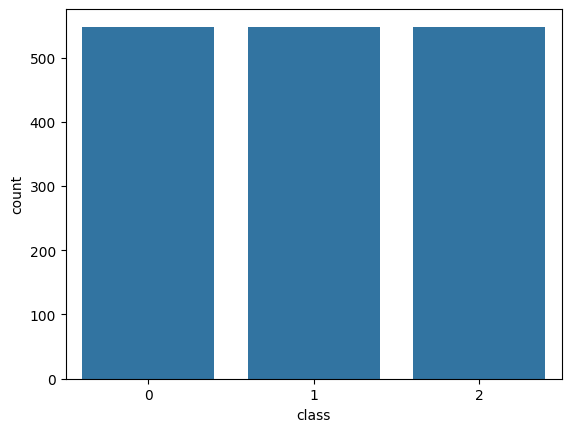

In [114]:
ax = sns.countplot(x="class", data=df_balanced_final)
df_balanced_final["class"].value_counts()

In [115]:
df_balanced_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F01     1644 non-null   float64
 1   F02     1644 non-null   float64
 2   F03     1644 non-null   float64
 3   F04     1644 non-null   float64
 4   F05     1644 non-null   float64
 5   F06     1644 non-null   float64
 6   F07     1644 non-null   float64
 7   F08     1644 non-null   float64
 8   F09     1644 non-null   float64
 9   F10     1644 non-null   float64
 10  F11     1644 non-null   float64
 11  F12     1644 non-null   int64  
 12  F13     1644 non-null   float64
 13  F14     1644 non-null   float64
 14  class   1644 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 192.8 KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score


## Split the data:

In [126]:
# Separate features and target
X = df_balanced_final.drop("class", axis=1)
y = df_balanced_final["class"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Train Classifiers  with Class Weights:


In [117]:
# Random Forest
rf_clf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Logistic Regression
lr_clf = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)


## Evaluate with F1-Score (Macro)

In [119]:
# Evaluate Random Forest
rf_f1_macro = f1_score(y_test, rf_pred, average="macro")
print(f"Random Forest F1-Score (Macro): {rf_f1_macro:.4f}")
print(classification_report(y_test, rf_pred, zero_division=1))

# Evaluate Logistic Regression
lr_f1_macro = f1_score(y_test, lr_pred, average="macro")
print(f"Logistic Regression F1-Score (Macro): {lr_f1_macro:.4f}")
print(classification_report(y_test, lr_pred, zero_division=1))


Random Forest F1-Score (Macro): 0.8835
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       109
           1       0.82      0.85      0.84       110
           2       0.96      0.99      0.97       110

    accuracy                           0.88       329
   macro avg       0.88      0.88      0.88       329
weighted avg       0.88      0.88      0.88       329

Logistic Regression F1-Score (Macro): 0.9423
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       109
           1       0.91      0.92      0.91       110
           2       0.96      0.97      0.97       110

    accuracy                           0.94       329
   macro avg       0.94      0.94      0.94       329
weighted avg       0.94      0.94      0.94       329



## `Applying GridSearchCV`:

In [120]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20],     # Depth of each tree
    "min_samples_split": [2, 5, 10], # Minimum samples to split
}

# Set up GridSearchCV
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid=rf_param_grid,
    scoring="f1_macro",  # Optimize for f1_score_macro
    cv=5,                # 5-fold cross-validation
    verbose=2            # Show progress
)

# Fit the model
rf_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters for Random Forest: {rf_grid.best_params_}")
print(f"Best F1-Score (Macro) for Random Forest: {rf_grid.best_score_:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_s

In [121]:
# Hyperparameter grid for Logistic Regression
lr_param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],      # Regularization strength
    "solver": ["liblinear", "lbfgs"],  # Optimization solvers
}

# Set up GridSearchCV
lr_grid = GridSearchCV(
    estimator=LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    param_grid=lr_param_grid,
    scoring="f1_macro",  # Optimize for f1_score_macro
    cv=5,                # 5-fold cross-validation
    verbose=2            # Show progress
)

# Fit the model
lr_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters for Logistic Regression: {lr_grid.best_params_}")
print(f"Best F1-Score (Macro) for Logistic Regression: {lr_grid.best_score_:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solv

In [122]:
# Evaluate the best Random Forest model
rf_best = rf_grid.best_estimator_
rf_test_pred = rf_best.predict(X_test)
rf_test_f1_macro = f1_score(y_test, rf_test_pred, average="macro")
print(f"Random Forest Test F1-Score (Macro): {rf_test_f1_macro:.4f}")
print(classification_report(y_test, rf_test_pred, zero_division=1))

# Evaluate the best Logistic Regression model
lr_best = lr_grid.best_estimator_
lr_test_pred = lr_best.predict(X_test)
lr_test_f1_macro = f1_score(y_test, lr_test_pred, average="macro")
print(f"Logistic Regression Test F1-Score (Macro): {lr_test_f1_macro:.4f}")
print(classification_report(y_test, lr_test_pred, zero_division=1))


Random Forest Test F1-Score (Macro): 0.8905
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       109
           1       0.83      0.85      0.84       110
           2       0.98      0.98      0.98       110

    accuracy                           0.89       329
   macro avg       0.89      0.89      0.89       329
weighted avg       0.89      0.89      0.89       329

Logistic Regression Test F1-Score (Macro): 0.9484
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.92      0.93      0.92       110
           2       0.97      0.96      0.97       110

    accuracy                           0.95       329
   macro avg       0.95      0.95      0.95       329
weighted avg       0.95      0.95      0.95       329



As we can see, the F1-Score (Macro) get much better for a balanced dataset.

`Unbalanced`:
>    - Random Forest: 0.6334
>    - Logistic Regression: 0.9248

`Balanced`:
>    - Random Forest: 0.8905
>    - Logistic Regression: 0.9484
    

# `Feature Selection with RFE (Recursive Feature Elimination)`:

## `RFE for Random Forest`:

In [132]:
from sklearn.feature_selection import RFE

# Initialize RFE with the best Random Forest model
rfe_rf = RFE(estimator=rf_best, n_features_to_select=5, step=1)  # Select top 5 features
rfe_rf.fit(X_train, y_train)

# Selected features
selected_features_rf = X_train.columns[rfe_rf.support_]
print(f"Selected Features for Random Forest: {list(selected_features_rf)}")


Selected Features for Random Forest: ['F02', 'F04', 'F07', 'F10', 'F14']


## `RFE for Logistic Regression`:

In [133]:
# Initialize RFE with the best Logistic Regression model
rfe_lr = RFE(estimator=lr_best, n_features_to_select=5, step=1)  # Select top 5 features
rfe_lr.fit(X_train, y_train)

# Selected features
selected_features_lr = X_train.columns[rfe_lr.support_]
print(f"Selected Features for Logistic Regression: {list(selected_features_lr)}")


Selected Features for Logistic Regression: ['F02', 'F07', 'F10', 'F11', 'F14']


## `Train and Test with Selected Features`:

- Once the top features are selected, train and evaluate the models using only these features.

### Train and Evaluate Random Forest with Selected Features:

In [134]:
# Subset data with selected features
X_train_rf_selected = X_train[selected_features_rf]
X_test_rf_selected = X_test[selected_features_rf]

# Train with the best Random Forest model
rf_best.fit(X_train_rf_selected, y_train)
rf_pred_selected = rf_best.predict(X_test_rf_selected)

# Evaluate
rf_f1_macro_selected = f1_score(y_test, rf_pred_selected, average="macro")
print(f"Random Forest F1-Score (Macro) with Selected Features: {rf_f1_macro_selected:.4f}")
print(classification_report(y_test, rf_pred_selected, zero_division=1))


Random Forest F1-Score (Macro) with Selected Features: 0.9054
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       109
           1       0.86      0.85      0.86       110
           2       0.95      0.97      0.96       110

    accuracy                           0.91       329
   macro avg       0.91      0.91      0.91       329
weighted avg       0.91      0.91      0.91       329



### Train and Evaluate Logistic Regression with Selected Features:

In [135]:
# Subset data with selected features
X_train_lr_selected = X_train[selected_features_lr]
X_test_lr_selected = X_test[selected_features_lr]

# Train with the best Logistic Regression model
lr_best.fit(X_train_lr_selected, y_train)
lr_pred_selected = lr_best.predict(X_test_lr_selected)

# Evaluate
lr_f1_macro_selected = f1_score(y_test, lr_pred_selected, average="macro")
print(f"Logistic Regression F1-Score (Macro) with Selected Features: {lr_f1_macro_selected:.4f}")
print(classification_report(y_test, lr_pred_selected, zero_division=1))


Logistic Regression F1-Score (Macro) with Selected Features: 0.9454
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       109
           1       0.91      0.93      0.92       110
           2       0.97      0.96      0.97       110

    accuracy                           0.95       329
   macro avg       0.95      0.95      0.95       329
weighted avg       0.95      0.95      0.95       329



As we can see, the F1-Score (Macro) increases for Random Forest, but decreases for Logistic Regression.

`Before RFE`:
>    - Random Forest: 0.8905
>    - Logistic Regression: 0.9484
    
`After RFE`:
>    - Random Forest: 0.9054
>    - Logistic Regression: 0.9454

## Feature Importance for Random Forest (Optional)

In [140]:
importances = rf_best.feature_importances_
X_train_rf_selected.columns

Index(['F02', 'F04', 'F07', 'F10', 'F14'], dtype='object')

In [141]:
# Get feature importances
importances = rf_best.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_train_rf_selected.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top features
print(feature_importance_df.head(5))


  Feature  Importance
4     F14    0.253034
3     F10    0.199710
0     F02    0.187213
2     F07    0.185144
1     F04    0.174899
